<a href="https://colab.research.google.com/github/cleysonl/ML_Bootcamp_CLL/blob/master/Data_visualization_storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Storytelling on Titanic**

In [0]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**Load Dataset**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/raghavbali/appliedml_workshop_dhs_av_2019/master/Module%2003%20-%20Data%20Visualization%20and%20Storytelling/titanic.csv")
df.shape

(891, 12)

**Sample records**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Dataset details**

In [4]:
# basic stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### **Story begins**

**Visualizing missing values using heatmaps**

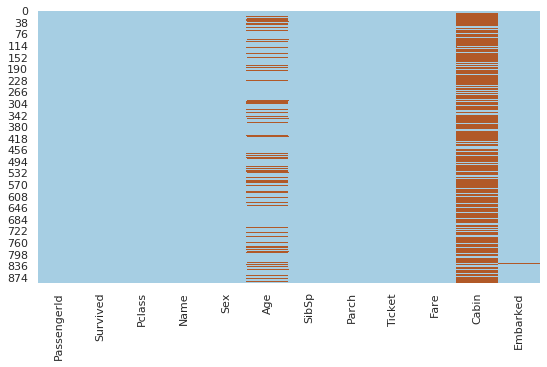

In [5]:
# set plotting canvas to 9x5 dimensions
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette("Paired"));

**Who Survived?**

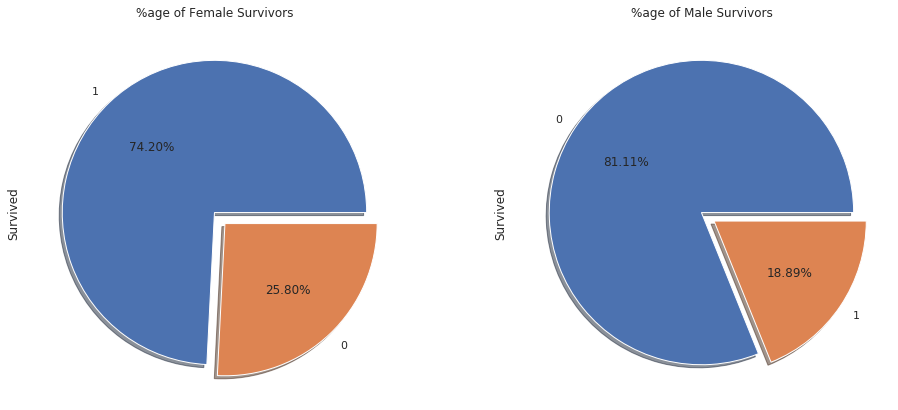

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))

df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)

df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[1], shadow=True)

ax[0].set_title('%age of Female Survivors')
ax[1].set_title('%age of Male Survivors');

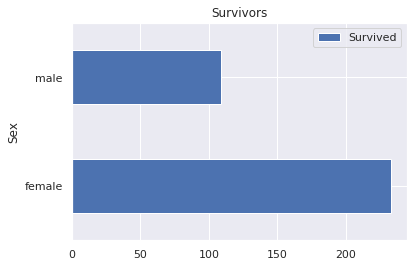

In [14]:
df.groupby('Sex').agg({'Survived': np.sum}).plot(kind='barh')
plt.title('Survivors');

**Does money make you Safer?**

In [15]:
pd.crosstab(df.Pclass, df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [16]:

print("% of survivals in")
print("Pclass=1 : {}%".format(
    round(
        df.Survived[df.Pclass == 1].sum() /
        df[df.Pclass == 1].Survived.count(), 5) * 100))
print("Pclass=2 : {}%".format(
    round(
        df.Survived[df.Pclass == 2].sum() /
        df[df.Pclass == 2].Survived.count(), 5) * 100))
print("Pclass=3 : {}%".format(
    round(
        df.Survived[df.Pclass == 3].sum() /
        df[df.Pclass == 3].Survived.count(), 5) * 100))

% of survivals in
Pclass=1 : 62.963%
Pclass=2 : 47.282999999999994%
Pclass=3 : 24.236%
